# Ana Beatriz Henriques e Anna Beathriz de Mauro
## Tema:
A partir do método de clusterização formaremos grupos de músicas com características semalhantes.Após finalizado este processo ensinaremos o computador a classificar as músicas nesses grupos relacionando-os a partir da sua letra.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import metrics
from scipy.spatial.distance import cdist, pdist, squareform
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture
import scipy


## I) Obtendo Datasets a partir da base de dados Spotify
## II) Filtrando os Datasets e colocando o resultado em um arquivo

In [2]:
df = pd.read_csv('brazil.csv', sep=',')
df2 = pd.read_csv('japao.csv', sep=',')
df3= pd.read_csv('polonia.csv', sep=',')
df4 = pd.read_csv('filipinas.csv', sep=',')
df5 = pd.read_csv('singapura.csv', sep=',')
df6 = pd.read_csv('malasia.csv', sep=',')
df7 = pd.read_csv('canada.csv', sep=',')
df8 = pd.read_csv('suica.csv', sep=',')
df9 = pd.read_csv('espanha.csv', sep=',')
df10 = pd.read_csv('italia.csv', sep=',')



df_new2 = pd.concat([df,df2,df3,df4,df5,df6,df7,df8,df9,df10],ignore_index = True)
lista_variaveis=['danceability','energy','loudness','tempo','valence','id']
for i in df_new2:
    if i in lista_variaveis:
        continue
    else:
        df_new2=df_new2.drop(i, axis=1)

lista=[]
for i in df_new2:
        n=0
        for c in df_new2[i]:

            if c==0:
                df_new2=df_new2.drop(n)
                lista.append(n)
                n=n+1
df_new=df_new2.drop_duplicates()
df_new.to_csv('todosfiltradoSem2.csv', sep=',')



## III) Possíveis técnicas de Clusterização

<h3>Gráfico base:</h3>

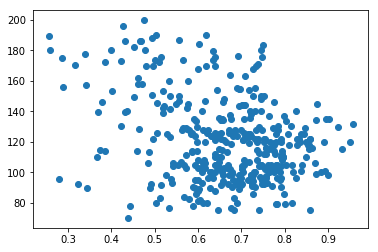

In [3]:
dados = pd.read_csv('todosfiltradoSem2.csv')

plt.plot(dados.danceability,dados.tempo,'o')
plt.show()

In [4]:
x1= dados.danceability
x2 = dados.energy
x3=dados.loudness
x4 = dados.tempo
x5= dados.valence
X = np.array(list(zip(x1, x2,x3,x4,x5))).reshape(len(x1), 5)

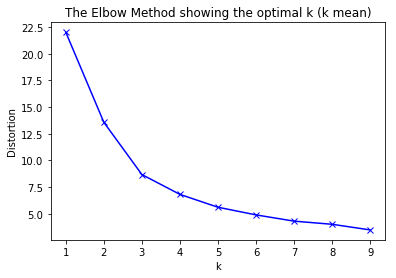

In [5]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k (k mean)')
plt.show()


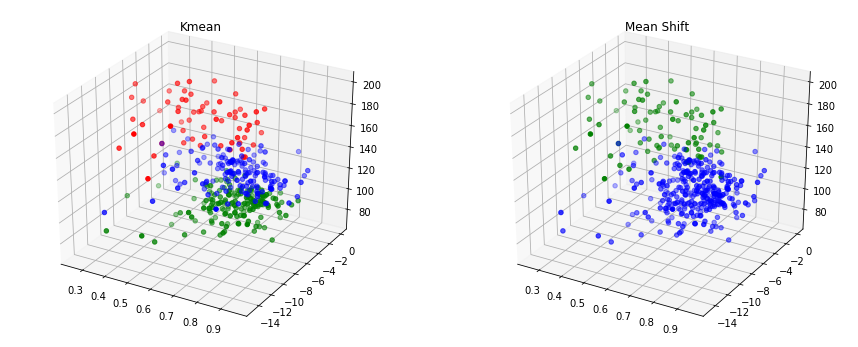

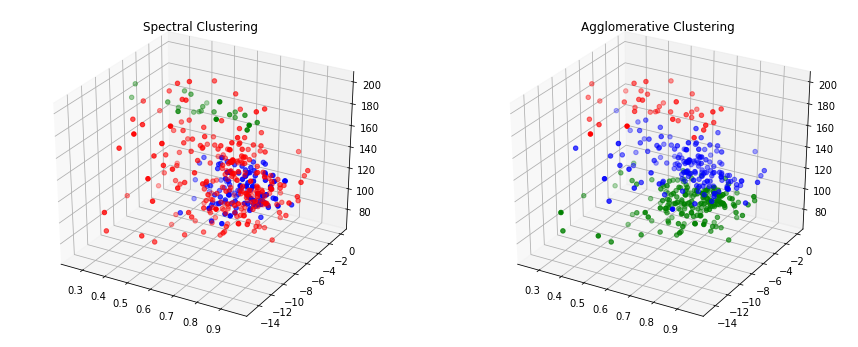

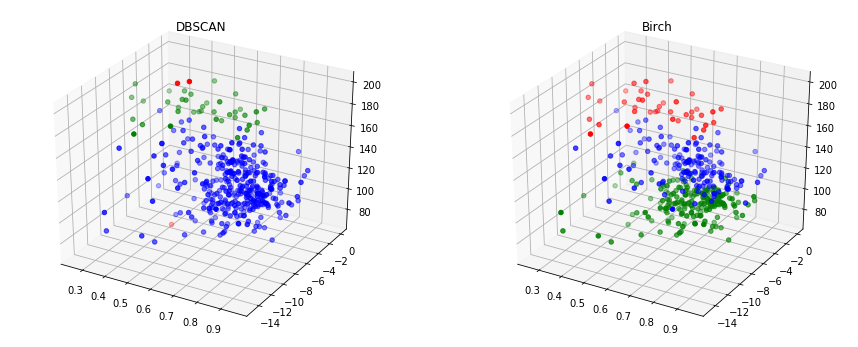

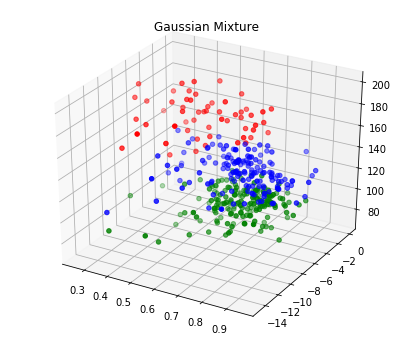

In [6]:
kmean = cluster.KMeans(n_clusters=3).fit(X)
labels_kmean = kmean.labels_
dados.loc[:,'Cluster'] = labels_kmean
fig = plt.figure(figsize=[15,6])
ax = fig.add_subplot(121, projection='3d')
ax.scatter(dados.danceability[dados.Cluster==0],dados.loudness[dados.Cluster==0],dados.tempo[dados.Cluster==0],marker = 'o',c='blue')
ax.scatter(dados.danceability[dados.Cluster==1],dados.loudness[dados.Cluster==1],dados.tempo[dados.Cluster==1],marker = 'o',c='green')
ax.scatter(dados.danceability[dados.Cluster==2],dados.loudness[dados.Cluster==2],dados.tempo[dados.Cluster==2],marker = 'o',c='red')
plt.title('Kmean')

ms = cluster.MeanShift(bin_seeding=True)
ms.fit(X)
labels_ms = ms.labels_
dados['Cluster'] = labels_ms
ax = fig.add_subplot(122, projection='3d')
ax.scatter(dados.danceability[dados.Cluster==0],dados.loudness[dados.Cluster==0],dados.tempo[dados.Cluster==0],marker = 'o',c='blue')
ax.scatter(dados.danceability[dados.Cluster==1],dados.loudness[dados.Cluster==1],dados.tempo[dados.Cluster==1],marker = 'o',c='green')
plt.title('Mean Shift')
plt.show()


sc = cluster.SpectralClustering(3)
sc.fit(X)
labels_sc = sc.labels_
dados.loc[:,'Cluster'] = labels_sc
fig = plt.figure(figsize=[15,6])
ax = fig.add_subplot(121, projection='3d')
ax.scatter(dados.danceability[dados.Cluster==0],dados.loudness[dados.Cluster==0],dados.tempo[dados.Cluster==0],marker = 'o',c='blue')
ax.scatter(dados.danceability[dados.Cluster==1],dados.loudness[dados.Cluster==1],dados.tempo[dados.Cluster==1],marker = 'o',c='green')
ax.scatter(dados.danceability[dados.Cluster==2],dados.loudness[dados.Cluster==2],dados.tempo[dados.Cluster==2],marker = 'o',c='red')
plt.title('Spectral Clustering')

model = cluster.AgglomerativeClustering(3).fit(X)
labels_ward=model.labels_
dados['Cluster'] = labels_ward
ax = fig.add_subplot(122, projection='3d')
ax.scatter(dados.danceability[dados.Cluster==0],dados.loudness[dados.Cluster==0],dados.tempo[dados.Cluster==0],marker = 'o',c='blue')
ax.scatter(dados.danceability[dados.Cluster==1],dados.loudness[dados.Cluster==1],dados.tempo[dados.Cluster==1],marker = 'o',c='green')
ax.scatter(dados.danceability[dados.Cluster==2],dados.loudness[dados.Cluster==2],dados.tempo[dados.Cluster==2],marker = 'o',c='red')
plt.title('Agglomerative Clustering')
plt.show()

D = squareform(pdist(X))
S = 1 - (D / np.max(D))
db = cluster.DBSCAN().fit(S)
labels_db = db.labels_
dados['Cluster'] = labels_db
fig = plt.figure(figsize=[15,6])
ax = fig.add_subplot(121, projection='3d')
ax.scatter(dados.danceability[dados.Cluster==0],dados.loudness[dados.Cluster==0],dados.tempo[dados.Cluster==0],marker = 'o',c='blue')
ax.scatter(dados.danceability[dados.Cluster==1],dados.loudness[dados.Cluster==1],dados.tempo[dados.Cluster==1],marker = 'o',c='green')
ax.scatter(dados.danceability[dados.Cluster==-1],dados.loudness[dados.Cluster==-1],dados.tempo[dados.Cluster==-1],marker = 'o',c='red')
plt.title('DBSCAN')

bc = cluster.Birch(threshold=0.1).fit(X)
labels_bc = bc.labels_
dados['Cluster'] = labels_bc
ax = fig.add_subplot(122, projection='3d')
ax.scatter(dados.danceability[dados.Cluster==0],dados.loudness[dados.Cluster==0],dados.tempo[dados.Cluster==0],marker = 'o',c='blue')
ax.scatter(dados.danceability[dados.Cluster==1],dados.loudness[dados.Cluster==1],dados.tempo[dados.Cluster==1],marker = 'o',c='green')
ax.scatter(dados.danceability[dados.Cluster==2],dados.loudness[dados.Cluster==2],dados.tempo[dados.Cluster==2],marker = 'o',c='red')
plt.title('Birch')
plt.show()

gm = mixture.GaussianMixture(n_components=3).fit(X)
labels_gm = gm.predict(X)
dados['Cluster'] = labels_gm
fig = plt.figure(figsize=[7,6])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dados.danceability[dados.Cluster==0],dados.loudness[dados.Cluster==0],dados.tempo[dados.Cluster==0],marker = 'o',c='blue')
ax.scatter(dados.danceability[dados.Cluster==1],dados.loudness[dados.Cluster==1],dados.tempo[dados.Cluster==1],marker = 'o',c='green')
ax.scatter(dados.danceability[dados.Cluster==2],dados.loudness[dados.Cluster==2],dados.tempo[dados.Cluster==2],marker = 'o',c='red')
plt.title('Gaussian Mixture')

plt.show()

<p>O método Affinity Propagation não foi plotado acima, porém está representado a seguir</p>

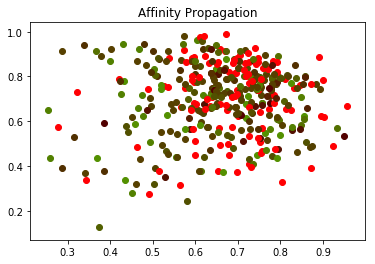

Essa técnica não é a mais adequada pois apresenta uma variedade muito grande de clusters:
[64 74 28 64 66 64 15  0 74  1  3  2  1  3 39  4 13  4  3  3 13 74 15  4  4
 39  3  4 34 35  4  4 13  5  6 28  3  7  4 51 13 28  8 34  4  3 15  4 13 39
 66 64  4 64  9 67 10 11 12  1 67 67 67 13  4 64 64 64 34  4 64 64  4  4  4
 13 74 28  4 14 64 64 15 39  3  1  1  3  1 64 64  4 64  4 28 13 16 64 74 64
 17 66 18 19 67 66 39 39 13  4 20  3 64 64 34  1 74  4 21 22 23 64  3  3 39
 66 74 34 64  4 64 64 24  4  3 25 39 67 13 64 26  4 27 39 64 15 15 39 34 64
 64 15 74  1 28 15 64  4 29 64 30 74 15 31 51 64 32  3 15  4 33 74  3 34 15
  4 51 66 64 64 34 35 64 36 74 37  4 51  4 67 38 39 39  4 34 51 28 15 28  1
 40 41 67 42 64 13 43 44  4 15  1 39  3 15 64 15 45 46 34 64 13 47 34 48 28
 64  1 57 49  2 50  3  1  1 51 28 66 52 13 34 53 54 15 55 39 15 39 34 28 13
 64 15 15  4 13 64 28 64 15 74 34 34  4 15 13 28  3 56 34 74  1 64  4 39 66
 57 39 34 28 58  1 15 74 11 59  1 13 67 15 64 64 60 66 61 34 64 62 64 63 6

In [7]:
S = metrics.pairwise.euclidean_distances(X)
aff_pro = cluster.AffinityPropagation().fit(S)
labels_aff = aff_pro.labels_
for i in range(len(x1)):
    if labels_aff[i]<10:
        plt.scatter(x1[i], x2[i], c='#ff000{}'.format(labels_aff[i]))
    else:
        plt.scatter(x1[i], x2[i], c='#5{}000'.format(labels_aff[i]))
plt.title('Affinity Propagation')
plt.show()
print('Essa técnica não é a mais adequada pois apresenta uma variedade muito grande de clusters:\n{}'.format(labels_aff))

## IV) K means como técnica a ser utilizada

In [8]:
kmean = cluster.KMeans(n_clusters=3).fit(X)
labels_kmean = kmean.labels_
dados.loc[:,'Cluster'] = labels_kmean

In [9]:
print(scipy.stats.f_oneway(dados.energy[dados.Cluster==0],dados.energy[dados.Cluster==1],dados.energy[dados.Cluster==2]), '\nvalor p > 0,10')

F_onewayResult(statistic=0.17101526780972295, pvalue=0.84287091688305404) 
valor p > 0,10


In [10]:
print(scipy.stats.f_oneway(dados.loudness[dados.Cluster==0],dados.loudness[dados.Cluster==1],dados.loudness[dados.Cluster==2]),'\nvalor p > 0,10')

F_onewayResult(statistic=1.1519911057692167, pvalue=0.31706362137217936) 
valor p > 0,10


In [11]:
print(scipy.stats.f_oneway(dados.tempo[dados.Cluster==0],dados.tempo[dados.Cluster==1],dados.tempo[dados.Cluster==2]), '\nvalor p < 0,01 => necessário analisar mais profundamente')

F_onewayResult(statistic=1241.0321738209809, pvalue=2.7653358452479632e-171) 
valor p < 0,01 => necessário analisar mais profundamente


In [12]:
print(scipy.stats.f_oneway(dados.valence[dados.Cluster==0],dados.valence[dados.Cluster==1],dados.valence[dados.Cluster==2]), '\nvalor p > 0,10')

F_onewayResult(statistic=0.40847640597021417, pvalue=0.66494188130796661) 
valor p > 0,10


In [13]:
print(scipy.stats.f_oneway(dados.danceability[dados.Cluster==0],dados.danceability[dados.Cluster==1],dados.danceability[dados.Cluster==2]), '\nvalor p < 0,01 => necessário analisar mais profundamente')

F_onewayResult(statistic=33.433287351415473, pvalue=3.8317262155433709e-14) 
valor p < 0,01 => necessário analisar mais profundamente
